# Tutorial_010:  support vector machine 

In [1]:
%matplotlib inline

## 模型思想（binary classification，linear separable case）

#### 怎样求解

已知 labeled dataset $\{(\mathbf{x_i}, y_i),\; i=1,2,\cdots N\}$, 其中 $\mathbf{x_i}$ 表示feature vector, $y_i\in\{1, -1\}$ 标记样本$i$所属的类别。 对于linear separable case，我们可以找到能够完美分割这两类的“平面”，即存在满足如下条件的参数$(\mathbf{w}, b)$：

$$
\begin{eqnarray}
\mathbf{w\cdot x_i} + b &\ge&\epsilon, ~~\text{for $y_i=1$, $\epsilon$ is a small number}\\
\mathbf{w\cdot x_i} + b &\le& -\epsilon, ~~\text{for $y_i=-1$}
\end{eqnarray}
$$

我们“最优化”的目标是，寻找一个平面的“方向”（由其“法向量”$\mathbf{w}$决定），使得两类样本点在这个方向上的间隔 (如图中$d_A$所示) 最大。

![svm_1](images/svm_1.jpg)


由于我们最优化的目标是寻找“平面”方向，而“平面”方向对参数$\mathbf{w}$的依赖存在一个任意因子，因此我们将参数的 candidate 集合（“可行解”集合）限定为满足条件：

$$
\begin{eqnarray}
\mathbf{w\cdot x_i} + b \ge1, ~~\text{for $y_i=1$}&&\\
&\Longleftrightarrow& y_i(\mathbf{w\cdot x_i} + b)>1~~\text{for every sample $i$}\qquad\text{(1)}\\
\mathbf{w\cdot x_i} + b \le-1, ~~\text{for $y_i=-1$}&&
\end{eqnarray}
$$

此时，两类样本点间隔的下限值等于平面$\mathbf{w\cdot x} + b=1$ 和 $\mathbf{w\cdot x} + b=-1$ 之间的距离$d$：

$$d={2\over \|w\|}\qquad\text{(2)}$$

> 平面 $Ax + By + Cz + D_1 = 0$ 和 $Ax + By + Cz + D_2 = 0$ 之间的距离为 $d={|D_1 - D_2|\over\sqrt{A^2 + B^2 + C^2}}$  

落在这两个 boundary 平面上的样本点称为**“support vector”**.

根据Eq.(2) 最大化间隔$d$, 等价于最小化$\|\mathbf{w}\|$, 因此结合Eq.(1), 我们的最优化问题定义为：

$$\mathop{min}\limits_{\mathbf{w}, b}{\|w\|^2\over 2},\qquad s.t.\quad y_i(\mathbf{w\cdot x_i} + b)\ge1~~\text{for every sample $i$}\qquad\text{(3)}$$

（s.t. means subject to）

#### 怎样决策

显然，求出模型最优解 $(\mathbf{w}^*, b^*)$后，新的类别预测值由以下关系给出
$$y = \mathop{sign}(\mathbf{w^*\cdot x} + b^*)\qquad\text{(*)}$$


## 模型求解与对偶方法

最优化问题 Eq.(3) 对应的 [拉格朗日量，KKT条件 和 primary form](appendix_Lagrangian.ipynb)为

$$\text{拉格朗日量：}L(w,b|\alpha)\equiv {\|w\|^2\over 2} + \sum\limits_i\alpha_i\left(1 - y_i(\mathbf{w\cdot x_i} + b)\right)$$

$$
\text{Karush-Kuhn-Tucker条件}\left\{\begin{align}
&{\partial L\over\partial \mathbf{w}} =0,\;{\partial L\over\partial b} =0 \Longrightarrow \mathbf{w} = \sum_i\alpha_iy_i\mathbf{x}_i,\;0 = \sum_i\alpha_iy_i\\
&\alpha_i\left(1 - y_i(\mathbf{w\cdot x_i} + b)\right)=0\quad j=1,2,\cdots,n \text{ 该条件要求非“边界点”（support vectors） 对应的$\alpha_i=0$}\\
&\alpha_i\ge 0\quad j=1,2,\cdots,n\\
&y_i(\mathbf{w\cdot x_i} + b)\ge 1\quad j=1,2,\cdots,n
\end{align}\right.
$$

$$\text{primary form: } \min\limits_{\mathbf{w}, b}\left(\max\limits_{\alpha\ge0}L(w,b|\alpha)\right)$$

由于这里不等式约束满足“凸函数”要求，我们可以通过[对偶问题](appendix_Lagrangian.ipynb)的方式进行求解


$$\text{dual form: } \max\limits_{\alpha\ge0}\left(\min\limits_{\mathbf{w}, b}L(w,b|\alpha)\right)$$

具体包括以下步骤

- 步骤1：
$$
{\partial L\over\partial \mathbf{w}} =0,\;{\partial L\over\partial b} =0 \Longrightarrow \mathbf{w} = \sum_i\alpha_iy_i\mathbf{x}_i,\;0 = \sum_i\alpha_iy_i
$$

- 步骤2：

将此关系代入$L$表达式，dual form 化为：

$$\begin{align}
&\max\limits_{\alpha } \theta_D(\alpha)\qquad s.t.\; \text{$\forall i:\alpha_i\ge 0$, 且 $\sum\limits_i\alpha_iy_i=0$}\qquad\text{(4)}\\
&\text{其中 }\theta_D(\alpha)\equiv \sum\limits_i\alpha_i - \frac{1}{2}\sum\limits_{ij}\alpha_i
\alpha_jy_iy_j\mathbf{x}_i\cdot \mathbf{x}_j
\end{align}
$$

> "quadratic form": SMO 算法（Sequential Minimal Optimization）求极值

- 步骤3：

依据公式（4）求解出dual form的最优解$\alpha^*$ 后，根据如下关系求出primary form的最优解$(\mathbf{w}^*,b^*)$:

$$\begin{eqnarray}
\mathbf{w}^*&=&\sum_i\alpha^*_iy_i\mathbf{x}_i\\
b^*&=&-{\max\limits_{i: y_i=-1}(\mathbf{w^*\cdot x_i}) + \min\limits_{i: y_i=1}(\mathbf{w^*\cdot x_i})\over 2}
\end{eqnarray}\qquad\text{(5)}
$$
并验证 $(\alpha^*, \mathbf{w}^*, b^*)$ 是否满足 KKT 条件 （注意KKT条件确保**仅有support vectors 对应的$\alpha_i$ 非 0**）


## “核函数”



注意到模型求解的公式(4),仅依赖于特征向量的“内积”$\mathbf{x}_i\cdot \mathbf{x}_j$


同样将公式(5)代入公式（*），我们发现决策公式，也仅依赖于“内积”:

$$y=\mathop{sign}\left( \sum_i\alpha^*_iy_i\mathbf{x_i\cdot x} + b^* \right)$$

而特征向量的选取存在一定的任意性，例如若我们选取$\tilde{\mathbf{x}}=\mathbf{\phi(x)}$,作为特征向量，则上述所有推导都成立。（即，此时模型求解和决策公式将依赖于特征向量 $\tilde{\mathbf{x}}$ 的“内积”。）我们不妨令 **“核函数”** $k(\mathbf{x}_1,\mathbf{x}_2)\equiv \mathbf{\phi(x_1)}\cdot \mathbf{\phi(x_2)}$， ($\mathbf{\phi(x)}$ 可以是关于$\mathbf{x}$的一个无穷级数，甚至没有显式的表达!)

利用 **“核函数”**，公式（4）、（*）、（5）可分别改写为：

$$\begin{align}
&\alpha^*=\mathop{\rm argmax}\limits_{\alpha } \left(\sum\limits_i\alpha_i - \frac{1}{2}\sum\limits_{ij}\alpha_i
\alpha_jy_iy_j k(\mathbf{x}_i, \mathbf{x}_j)\right)\qquad s.t.\; \text{$\forall i:\alpha_i\ge 0$, 且 $\sum\limits_i\alpha_iy_i=0$}\qquad\text{(4')}\\
&y=\mathop{\rm sign}\left( \sum_i\alpha^*_iy_ik(\mathbf{x}_i, \mathbf{x}) + b^* \right)\qquad\text{(*')}\\
&b^*=-\frac{\max\limits_{i:y_i=-1}\left(\sum\limits_j\alpha^*_jy_jk(\mathbf{x}_j, \mathbf{x}_i)\right) + 
\min\limits_{i:y_i=1}\left(\sum\limits_j\alpha^*_jy_jk(\mathbf{x}_j, \mathbf{x}_i)\right) }{2}\qquad\text{(5')}
\end{align}
$$
（注意：这里形式上模型完全依赖于 dual参数 $\alpha^*$，而不再需要显式地求出$\mathbf{w}^*, b^*$）


> **“核函数”方法有效的原因**：核函数本质上是特征向量由**低维空间**向**高维空间**的非线性变换。而在低维空间不能用“超平面”分割的类往往可以在**高维空间**被“超平面”分割，例如：![svm_2](images/svm_2.jpg)


常用的核函数,例如

- 多项式核:
    $$k(\mathbf{x}_1, \mathbf{x}_2) \equiv \left(\mathbf{x}_1\cdot\mathbf{x}_2+R\right)^d$$

- 高斯核 rbf（Radial Basis Function）：
    $$k(\mathbf{x}_1, \mathbf{x}_2) \equiv \exp\left(-\frac{\|\mathbf{x}_1-\mathbf{x}_2\|^2}{2\sigma^2}\right)$$

- [文章推荐1](http://blog.csdn.net/v_july_v/article/details/7624837)
- [文章推荐2](https://zhuanlan.zhihu.com/p/24638007)

## 超参数

SVM come in two kinds: SVCs, Support Vector Classifiers, for classification problems, and SVRs, Support Vector Regressors, for regression problems.

The most important parameter of the SVM is the regularization parameter $C$, which bounds the influence of each individual sample:

- Low C values: many support vectors... Decision frontier = mean(class A) - mean(class B)
- High C values: small number of support vectors: Decision frontier fully driven by most discriminant samples

The other important parameters are those of the kernel.

**一个例子**

blob seed: 125


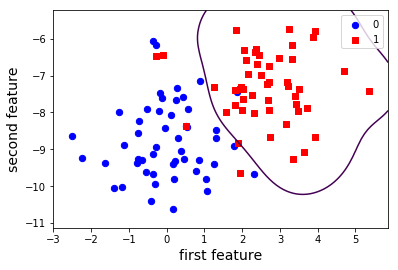

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from utils import load_blobs, plot_blobs
from utils import plot_blobs, plot_2d_boundary

x, y = load_blobs()

# clf = SVC(C=1, kernel='rbf', gamma=1)
# clf = SVC(C=1, kernel='rbf', gamma=10)
# clf = SVC(C=0.1, kernel='rbf', gamma=0.5)
clf = SVC(C=0.1, kernel='rbf', gamma=1)


clf.fit(x, y)

xmin, xmax = np.min(x[:, 0])-0.5, np.max(x[:, 0])+0.5
ymin, ymax = np.min(x[:, 1])-0.5, np.max(x[:, 1])+0.5

plot_blobs(x, y)

plot_2d_boundary(clf, xmin, xmax, ymin, ymax)

plt.show()

In [17]:
SVC?



